In [2]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import numpy as np
from scipy import stats
import seaborn as sns
from functools import reduce
pd.options.mode.chained_assignment = None 
from statistics import mean
from Profile_Generation import *
from plotting import *
import warnings
warnings.simplefilter('ignore', np.RankWarning)
from scipy.optimize import curve_fit
import matplotlib.patches as patches
from scipy.optimize import curve_fit
from openpyxl import load_workbook
import math
from scipy.optimize import OptimizeWarning
warnings.simplefilter("ignore", OptimizeWarning)
import timeit
from sklearn.metrics import mean_squared_error
from matplotlib.pyplot import cm
from matplotlib.patches import Patch
from scipy import stats
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.stats import levene
import sys

In [13]:
%%time
# Retrieve dose, response, day, for patient 120
result_file = 'CURATE_results.xlsx'
dat = pd.read_excel(result_file, sheet_name='result')

dat

Wall time: 21.1 s


,patient,method,pred_day,fit_dose_1,fit_dose_2,fit_dose_3,fit_dose_4,fit_dose_5,fit_dose_6,fit_dose_7,...,prev_coeff_2x,prev_coeff_1x,prev_coeff_0x,prev_deviation,coeff_2x,coeff_1x,coeff_0x,prediction,deviation,abs_deviation
0,84,L_Cum_origin_dp,4,0.000000,0.051546,0.103093,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,27.160000,0.333333,4.533333,-1.333333,1.333333
1,84,L_Cum_origin_dp,5,0.000000,0.051546,0.103093,0.154639,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,19.400000,0.600000,3.600000,-0.500000,0.500000
2,84,L_Cum_origin_dp,6,0.000000,0.051546,0.103093,0.154639,0.154639,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.688235,0.658824,6.129412,1.770588,1.770588
3,84,L_Cum_origin_dp,7,0.000000,0.051546,0.103093,0.154639,0.154639,0.309278,NaN,...,NaN,NaN,NaN,NaN,NaN,23.280000,0.233333,7.433333,2.566667,2.566667
4,84,L_Cum_origin_dp,8,0.000000,0.051546,0.103093,0.154639,0.154639,0.309278,0.309278,...,NaN,NaN,NaN,NaN,NaN,27.948125,-0.121875,8.521875,1.778125,1.778125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72301,138,Q_RW_wo_origin_tau,16,0.162602,0.081301,0.108401,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4266.3780,-997.530000,64.600000,6.600000,2.000000,2.000000
72302,138,Q_RW_wo_origin_tau,17,0.081301,0.108401,0.135501,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4833.7155,-1105.155000,69.600000,8.600000,0.400000,0.400000
72303,138,Q_RW_wo_origin_tau,18,0.108401,0.135501,0.162602,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-1089.2880,339.480000,-17.400000,9.000000,-3.100000,3.100000
72304,138,Q_RW_wo_origin_tau,19,0.135501,0.162602,0.081301,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-431.1765,143.295000,-2.900000,5.900000,-0.400000,0.400000


In [15]:
df = dat.copy()
df

,patient,method,pred_day,fit_dose_1,fit_dose_2,fit_dose_3,fit_dose_4,fit_dose_5,fit_dose_6,fit_dose_7,...,prev_coeff_2x,prev_coeff_1x,prev_coeff_0x,prev_deviation,coeff_2x,coeff_1x,coeff_0x,prediction,deviation,abs_deviation
0,84,L_Cum_origin_dp,4,0.000000,0.051546,0.103093,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,27.160000,0.333333,4.533333,-1.333333,1.333333
1,84,L_Cum_origin_dp,5,0.000000,0.051546,0.103093,0.154639,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,19.400000,0.600000,3.600000,-0.500000,0.500000
2,84,L_Cum_origin_dp,6,0.000000,0.051546,0.103093,0.154639,0.154639,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.688235,0.658824,6.129412,1.770588,1.770588
3,84,L_Cum_origin_dp,7,0.000000,0.051546,0.103093,0.154639,0.154639,0.309278,NaN,...,NaN,NaN,NaN,NaN,NaN,23.280000,0.233333,7.433333,2.566667,2.566667
4,84,L_Cum_origin_dp,8,0.000000,0.051546,0.103093,0.154639,0.154639,0.309278,0.309278,...,NaN,NaN,NaN,NaN,NaN,27.948125,-0.121875,8.521875,1.778125,1.778125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72301,138,Q_RW_wo_origin_tau,16,0.162602,0.081301,0.108401,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4266.3780,-997.530000,64.600000,6.600000,2.000000,2.000000
72302,138,Q_RW_wo_origin_tau,17,0.081301,0.108401,0.135501,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4833.7155,-1105.155000,69.600000,8.600000,0.400000,0.400000
72303,138,Q_RW_wo_origin_tau,18,0.108401,0.135501,0.162602,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-1089.2880,339.480000,-17.400000,9.000000,-3.100000,3.100000
72304,138,Q_RW_wo_origin_tau,19,0.135501,0.162602,0.081301,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-431.1765,143.295000,-2.900000,5.900000,-0.400000,0.400000


(0.0, 2.5)

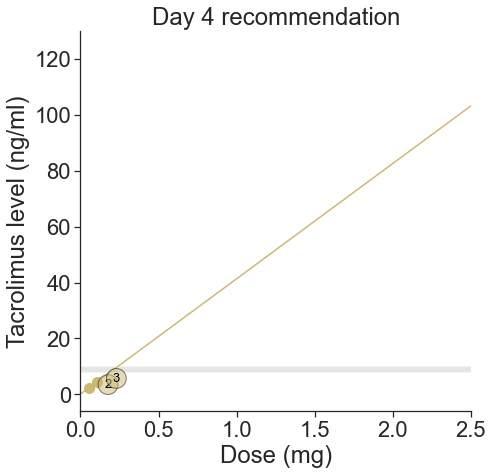

In [10]:
dat_original, combined_df = case_series_120()

# Subset first prediction since it could outperform SOC
dat = combined_df[combined_df.pred_day==4].reset_index(drop=True)

sns.set(style='white', font_scale=2,
       rc={"figure.figsize":(7,7), "xtick.bottom":True, "ytick.left":True})

# Plot regression line
x = np.array([dat.x[0],dat.x[1]])
y = np.array([dat.y[0],dat.y[1]])
a, b = np.polyfit(x, y, 1)
x_values = np.linspace(0, 3)
plt.plot(x_values, a*x_values + b, linestyle='-', color='y')

# Plot scatter points
plt.scatter(x, y, s=100, color='y')

# Plot therapeutic range
plt.axhspan(8, 10, facecolor='grey', alpha=0.2)

# Label days
for i in range(dat.shape[0]):
    plt.text(x=dat.x[i]+0.1,y=dat.y[i]+0.1,s=int(dat.day[i]),
             fontdict=dict(color='black',size=13),
             bbox=dict(facecolor='y', ec='black', alpha=0.5, boxstyle='circle'))

sns.despine()
plt.title('Day 4 recommendation')
plt.xlabel('Dose (mg)')
plt.ylabel('Tacrolimus level (ng/ml)')
plt.xticks(np.arange(0,3.5,step=0.5))
plt.xlim(0,2.5)

In [ ]:
%%time
# ~5mins

# Execute CURATE without pop tau
execute_CURATE(pop_tau_string='')

In [ ]:
%%time
# Perform CV
five_fold_cross_val_results, five_fold_cross_val_results_summary = find_pop_tau_with_CV()
execute_CURATE_and_update_pop_tau_results('CV', five_fold_cross_val_results_summary, five_fold_cross_val_results)

# Perform LOOCV
five_fold_cross_val_results, five_fold_cross_val_results_summary = find_pop_tau_with_LOOCV()
execute_CURATE_and_update_pop_tau_results('LOOCV', five_fold_cross_val_results_summary, five_fold_cross_val_results)